In [2]:
### Import relevant packages.
import csv
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import random

In [3]:
### Read the data. 
data = pd.read_csv("USDGBP_Hourly.csv")

In [4]:
data

,date,open,high,low,close,open1,high1,low1,close1,open2,...,sar2,fastK0,fastD0,stoch0,fastK1,fastD1,stoch1,fastK2,fastD2,stoch2
0,2000-06-04 20:00:00,1.51130,1.51130,1.51030,1.51110,1.51070,1.51140,1.51070,1.51130,1.50700,...,1.507000,0.931818,0.969697,0.987374,0.977273,0.992424,0.997475,1.000000,1.000000,1.000000
1,2000-06-04 21:00:00,1.51110,1.51200,1.51110,1.51160,1.51130,1.51130,1.51030,1.51110,1.51070,...,1.507000,0.920000,0.943030,0.968384,0.931818,0.969697,0.987374,0.977273,0.992424,0.997475
2,2000-06-04 22:00:00,1.51180,1.51180,1.51150,1.51160,1.51110,1.51200,1.51110,1.51160,1.51130,...,1.507176,0.920000,0.923939,0.945556,0.920000,0.943030,0.968384,0.931818,0.969697,0.987374
3,2000-06-04 23:00:00,1.51160,1.51160,1.51080,1.51150,1.51180,1.51180,1.51150,1.51160,1.51110,...,1.507345,0.900000,0.913333,0.926768,0.920000,0.923939,0.945556,0.920000,0.943030,0.968384
4,2000-06-05 00:00:00,1.51150,1.51170,1.51150,1.51170,1.51160,1.51160,1.51080,1.51150,1.51180,...,1.507624,0.940000,0.920000,0.919091,0.900000,0.913333,0.926768,0.920000,0.923939,0.945556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120837,2019-04-19 12:00:00,1.29998,1.30010,1.29943,1.29982,1.30021,1.30023,1.29958,1.29998,1.29968,...,1.299410,0.424084,0.568080,0.562758,0.578475,0.584982,0.552541,0.701681,0.535212,0.560984
120838,2019-04-19 13:00:00,1.29983,1.30011,1.29885,1.29938,1.29998,1.30010,1.29943,1.29982,1.30021,...,1.299580,0.256039,0.419533,0.524198,0.424084,0.568080,0.562758,0.578475,0.584982,0.552541
120839,2019-04-19 14:00:00,1.29938,1.29988,1.29896,1.29936,1.29983,1.30011,1.29885,1.29938,1.29998,...,1.300920,0.246377,0.308833,0.432149,0.256039,0.419533,0.524198,0.424084,0.568080,0.562758
120840,2019-04-19 15:00:00,1.29939,1.30013,1.29900,1.29947,1.29938,1.29988,1.29896,1.29936,1.29983,...,1.300920,0.299517,0.267311,0.331892,0.246377,0.308833,0.432149,0.256039,0.419533,0.524198


In [5]:
### Have a look at all the columns. Which information we have.
data.columns[2:]

Index(['high', 'low', 'close', 'open1', 'high1', 'low1', 'close1', 'open2',
       'high2', 'low2', 'close2', 'macd0', 'signal0', 'diff0', 'macd1',
       'signal1', 'diff1', 'macd2', 'signal2', 'diff2', 'rsi0', 'rsi1', 'rsi2',
       'dn0', 'mavg0', 'up0', 'pctB0', 'dn1', 'mavg1', 'up1', 'pctB1', 'dn2',
       'mavg2', 'up2', 'pctB2', 'sma20.0', 'sma20.1', 'sma20.2', 'sma50.0',
       'sma50.1', 'sma50.2', 'sma100.0', 'sma100.1', 'sma100.2', 'sar0',
       'sar1', 'sar2', 'fastK0', 'fastD0', 'stoch0', 'fastK1', 'fastD1',
       'stoch1', 'fastK2', 'fastD2', 'stoch2'],
      dtype='object')

In [6]:
### The results that we are trying to target is close each day.
dependent_data = data.loc[:, data.columns[5:]].values
target_data = data['close'].values

In [7]:
### Print how many columns we have, what kind of data we have
print (len(dependent_data[0]))
for k in dependent_data[0]:
    print(k,type(k))
### It seems we are dealing with float data. That's good.

53
1.5107 <class 'numpy.float64'>
1.5114 <class 'numpy.float64'>
1.5107 <class 'numpy.float64'>
1.5113 <class 'numpy.float64'>
1.507 <class 'numpy.float64'>
1.5107 <class 'numpy.float64'>
1.507 <class 'numpy.float64'>
1.5107 <class 'numpy.float64'>
0.0315431128886434 <class 'numpy.float64'>
0.00687773669032005 <class 'numpy.float64'>
0.0246653761983234 <class 'numpy.float64'>
0.020832270462411998 <class 'numpy.float64'>
0.0033729463693621398 <class 'numpy.float64'>
0.0174593240930498 <class 'numpy.float64'>
0.009524246861691841 <class 'numpy.float64'>
0.00105824965131883 <class 'numpy.float64'>
0.00846599721037301 <class 'numpy.float64'>
95.0000000000006 <class 'numpy.float64'>
100.0 <class 'numpy.float64'>
100.0 <class 'numpy.float64'>
1.5057274714166298 <class 'numpy.float64'>
1.5078533333333302 <class 'numpy.float64'>
1.50997919525004 <class 'numpy.float64'>
1.26361184166209 <class 'numpy.float64'>
1.5059803675924 <class 'numpy.float64'>
1.5077333333333303 <class 'numpy.float64'>
1.

In [8]:
### How our training data looks like:
dependent_data

array([[1.5107    , 1.5114    , 1.5107    , ..., 1.        , 1.        ,
        1.        ],
       [1.5113    , 1.5113    , 1.5103    , ..., 0.97727273, 0.99242424,
        0.99747475],
       [1.5111    , 1.512     , 1.5111    , ..., 0.93181818, 0.96969697,
        0.98737374],
       ...,
       [1.29983   , 1.30011   , 1.29885   , ..., 0.42408377, 0.56807993,
        0.56275811],
       [1.29938   , 1.29988   , 1.29896   , ..., 0.25603865, 0.41953258,
        0.52419816],
       [1.29939   , 1.30013   , 1.299     , ..., 0.24637681, 0.30883308,
        0.43214853]])

In [9]:
### And our target variable.
data['close']

0         1.51110
1         1.51160
2         1.51160
3         1.51150
4         1.51170
           ...   
120837    1.29982
120838    1.29938
120839    1.29936
120840    1.29947
120841    1.29857
Name: close, Length: 120842, dtype: float64

In [11]:
### We take a look at the shape of the data.
print (dependent_data.shape)
print (target_data.shape)

(120842, 53)
(120842,)


In [12]:
### We combine year and month to sort it better and also sort it by numbers.
def year_month(input_date_string):
    year = input_date_string[0:4]
    month = input_date_string[6:7]
    yearmon = year+month
    return int(yearmon)

In [13]:
data['date'][0][0:7]


'2000-06'

In [14]:
### And this is where we combine it.
yearmonth = []
for dt in data['date']:
    yearmonth.append(year_month(dt))
    
yearmonth

[20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,
 20006,


open1


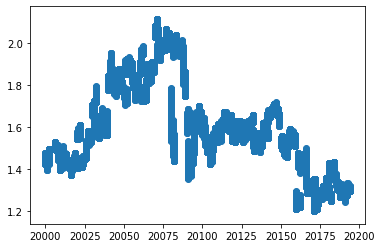

high1


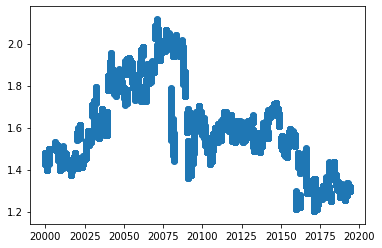

low1


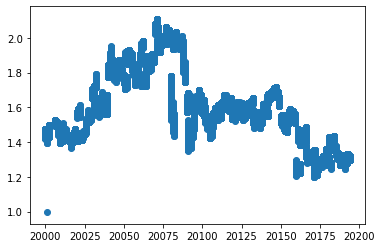

close1


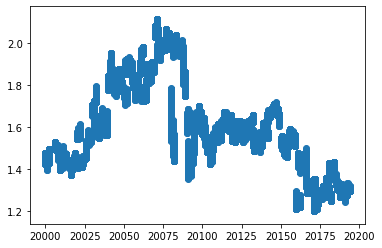

open2


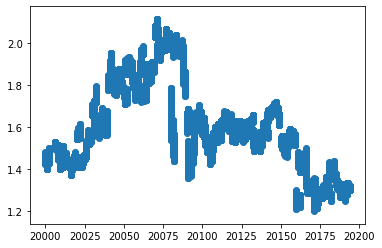

high2


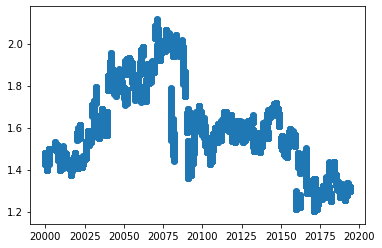

low2


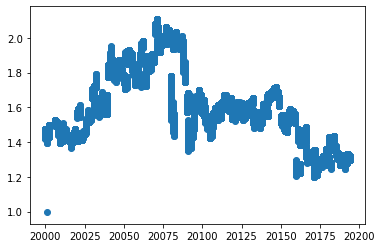

close2


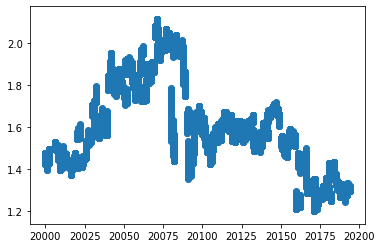

macd0


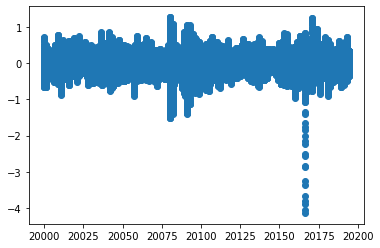

signal0


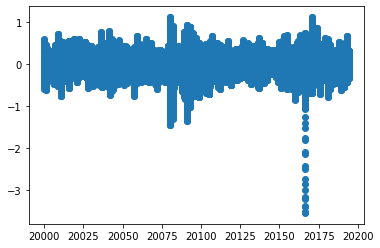

diff0


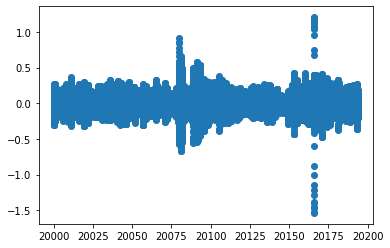

macd1


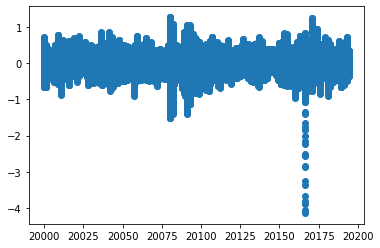

signal1


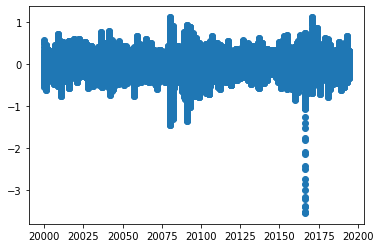

diff1


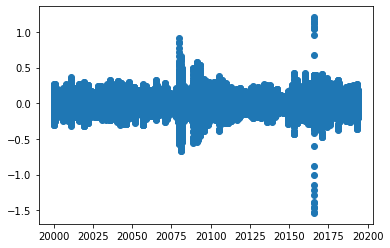

macd2


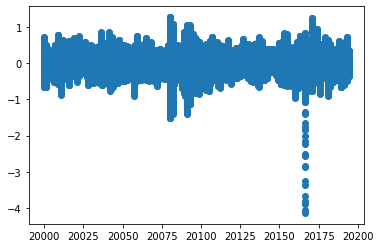

signal2


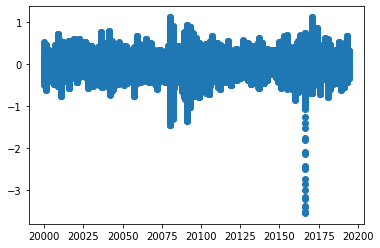

diff2


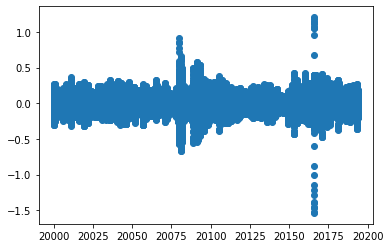

rsi0


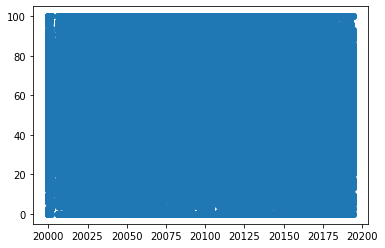

rsi1


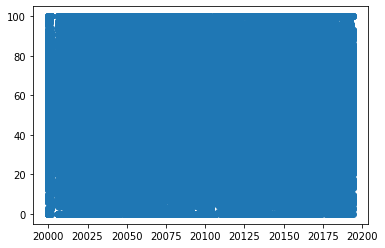

rsi2


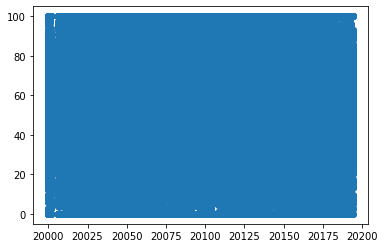

dn0


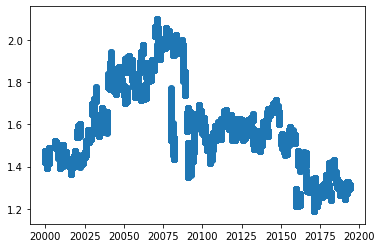

mavg0


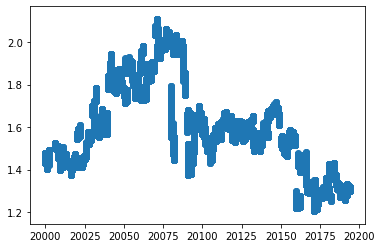

up0


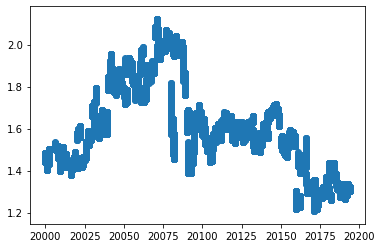

pctB0


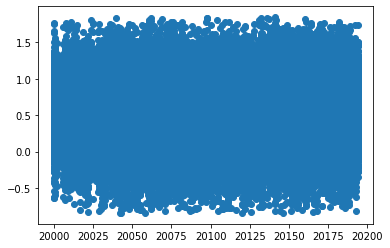

dn1


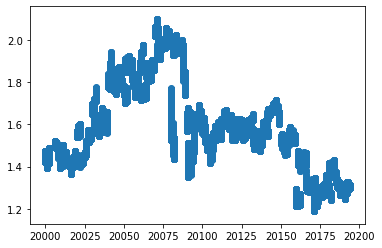

mavg1


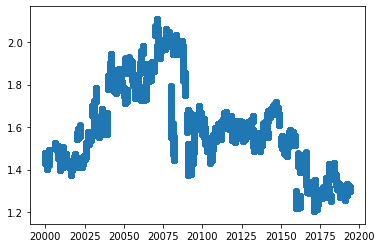

up1


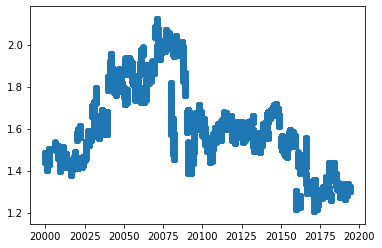

pctB1


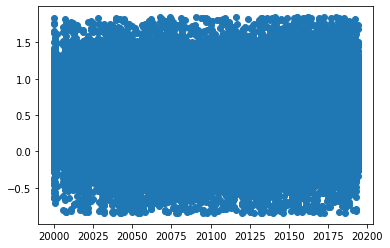

dn2


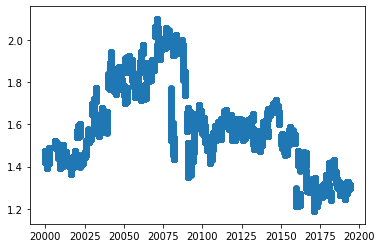

mavg2


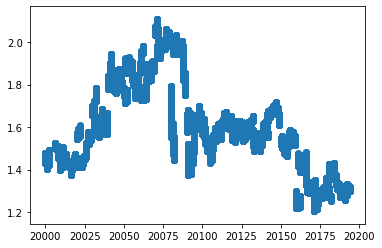

up2


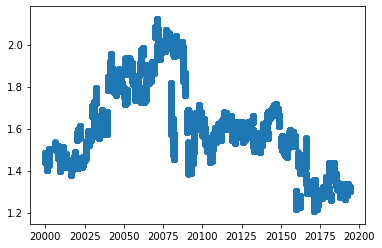

pctB2


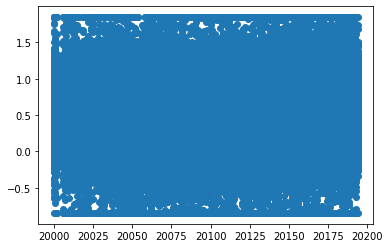

sma20.0


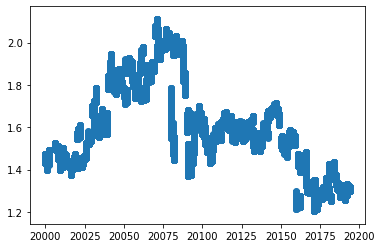

sma20.1


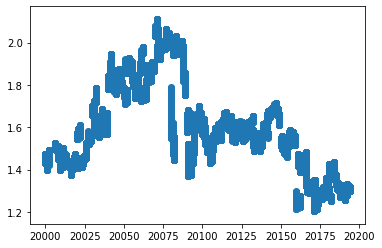

sma20.2


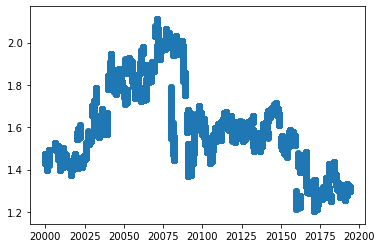

sma50.0


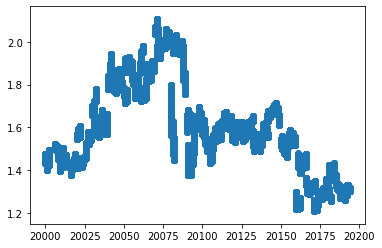

sma50.1


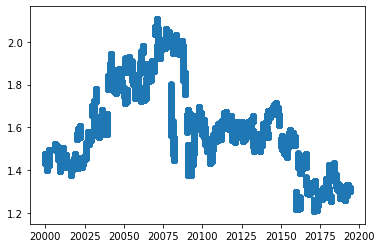

sma50.2


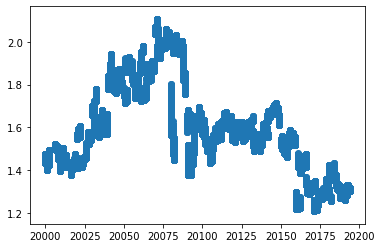

sma100.0


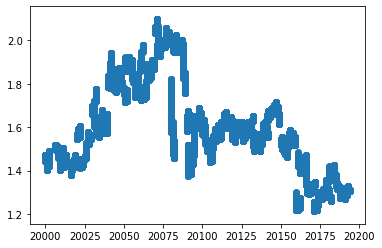

sma100.1


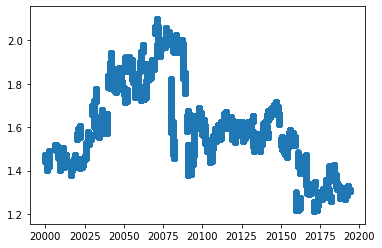

sma100.2


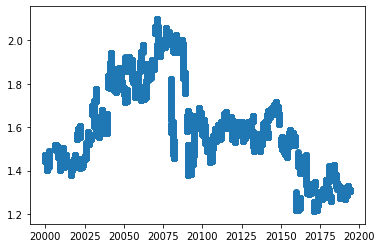

sar0


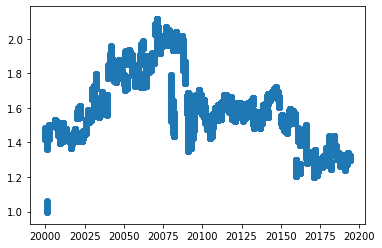

sar1


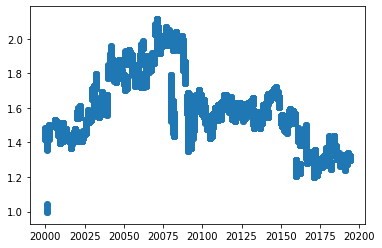

sar2


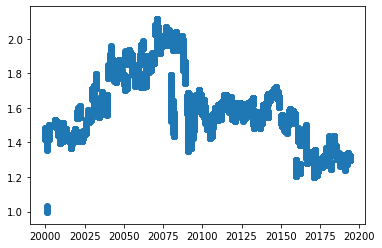

fastK0


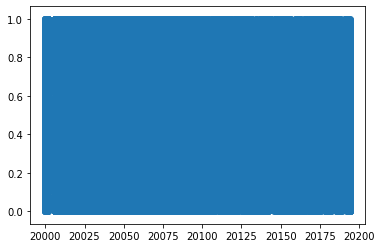

fastD0


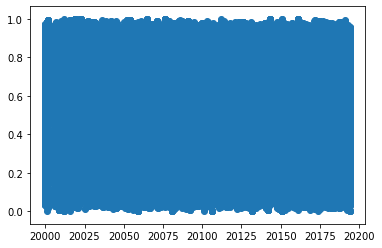

stoch0


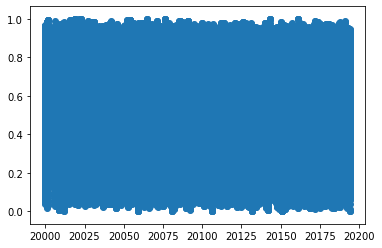

fastK1


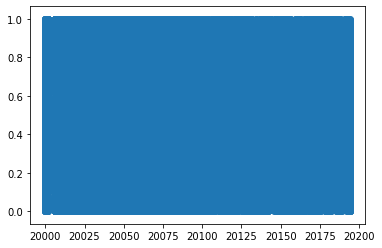

fastD1


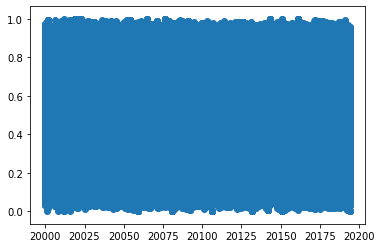

stoch1


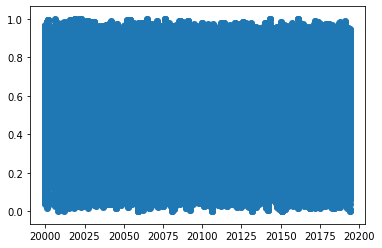

fastK2


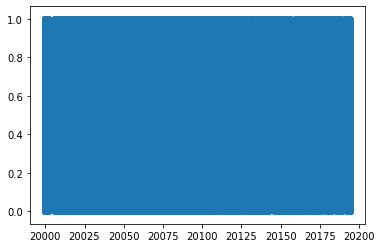

fastD2


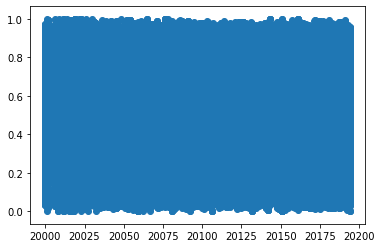

stoch2


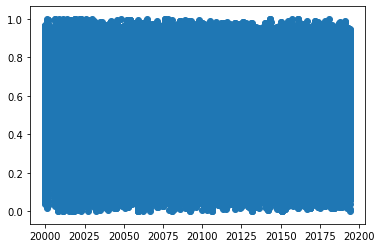

In [15]:
### How our data behaves over time. It shows how the data is constructed and if there are any outliers or
### strange occurances in data.
x = yearmonth#data['date']
for k in data.columns[5:]:
    print(k)
    plt.scatter(x,data[k])
    plt.show()

In [16]:
### we detected something strange in the data. There was one strong jump and fall around 2017. It was a very erratic
### behavior
yearmonth[107000:115000]

[20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,
 20173,


open1


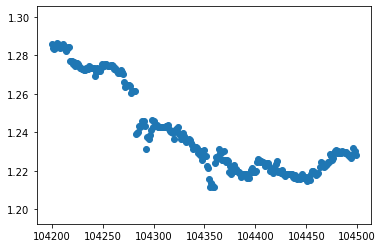

high1


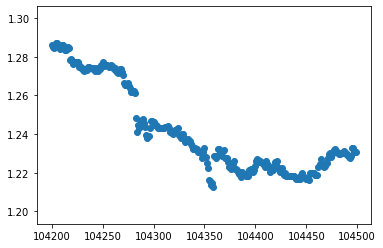

low1


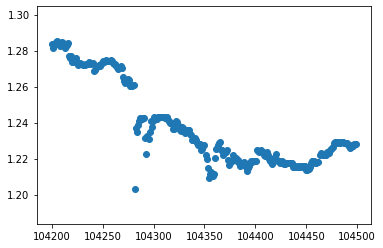

close1


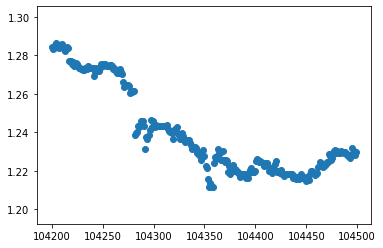

open2


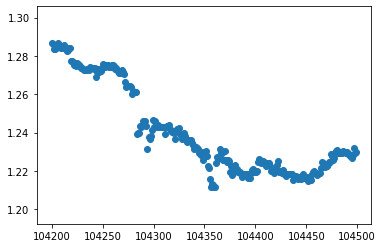

high2


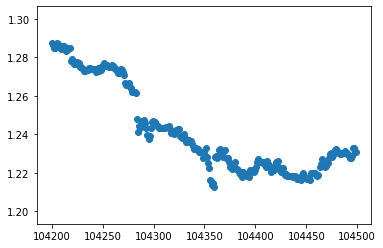

low2


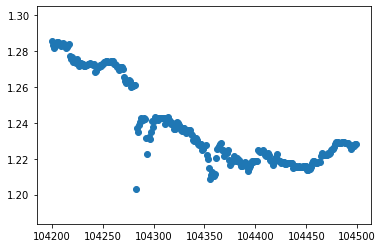

close2


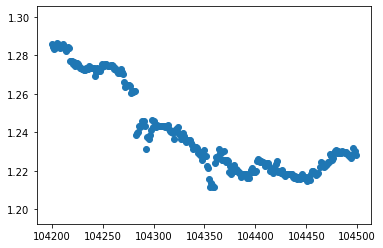

macd0


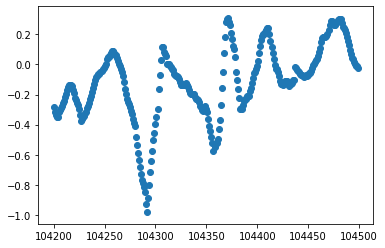

signal0


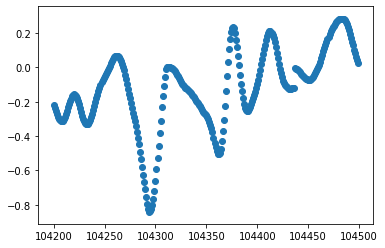

diff0


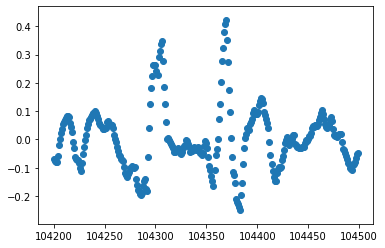

macd1


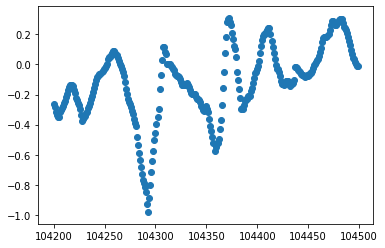

signal1


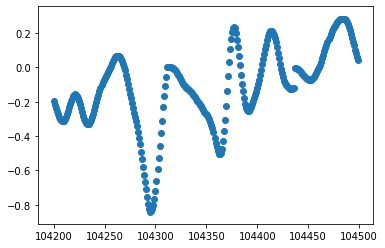

diff1


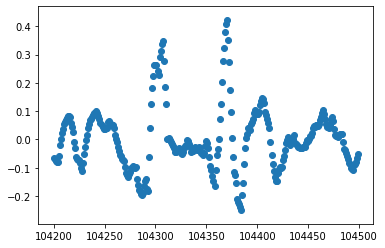

macd2


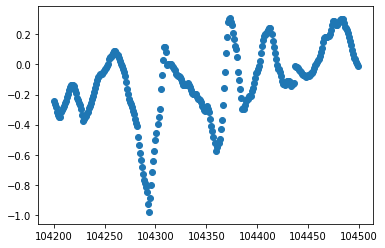

signal2


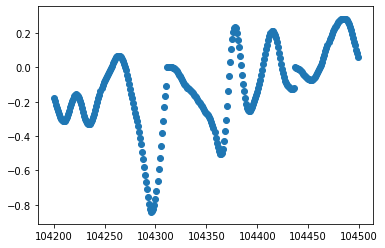

diff2


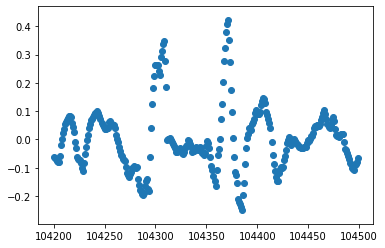

rsi0


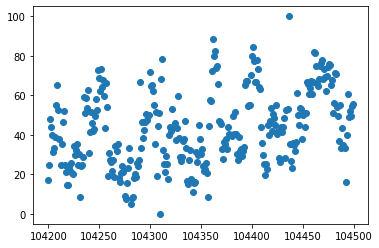

rsi1


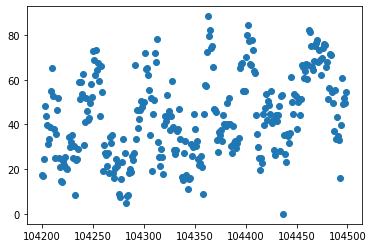

rsi2


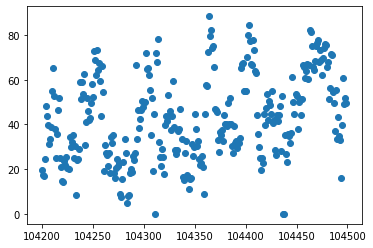

dn0


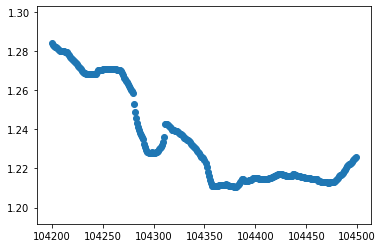

mavg0


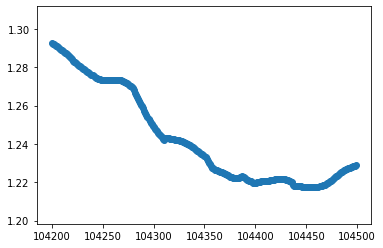

up0


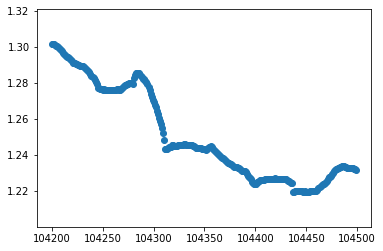

pctB0


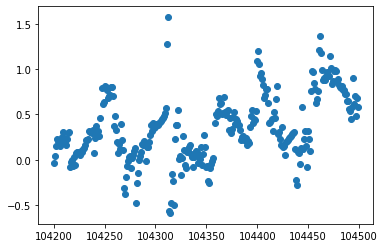

dn1


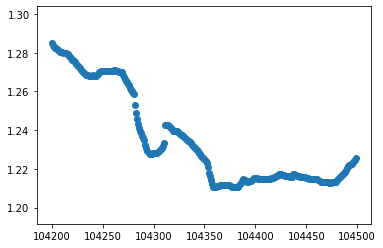

mavg1


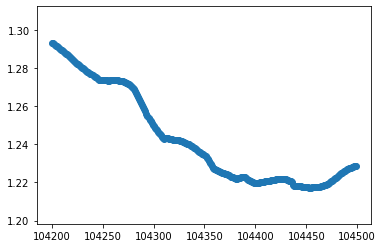

up1


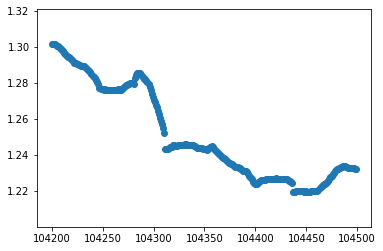

pctB1


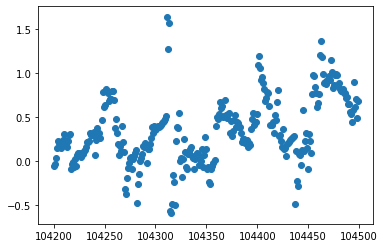

dn2


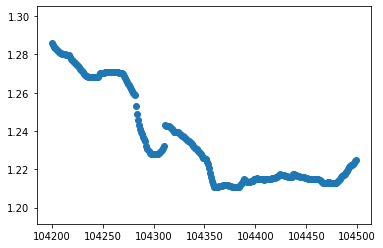

mavg2


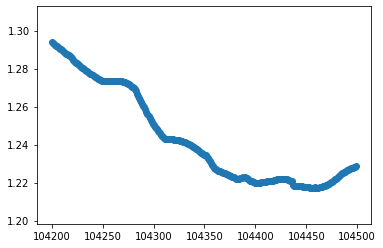

up2


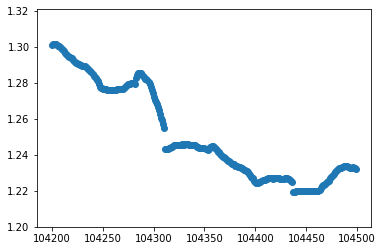

pctB2


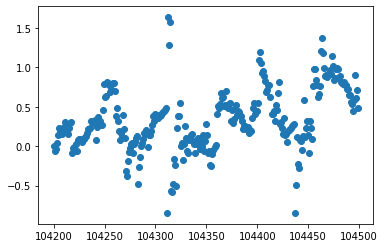

sma20.0


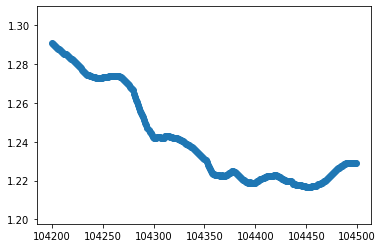

sma20.1


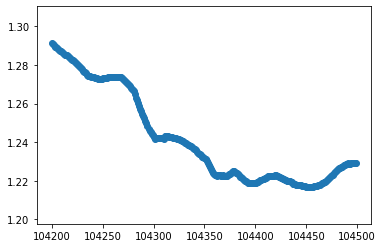

sma20.2


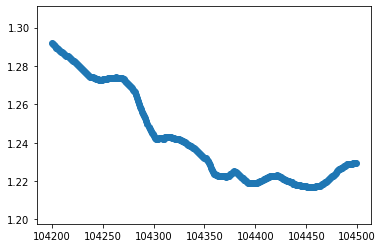

sma50.0


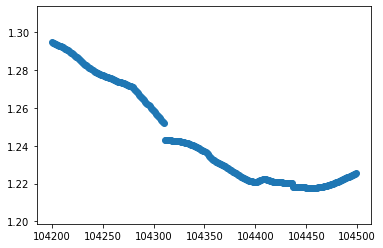

sma50.1


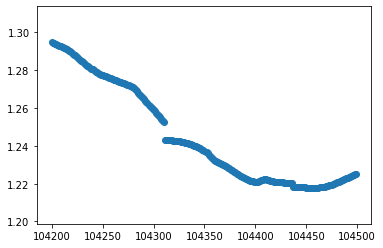

sma50.2


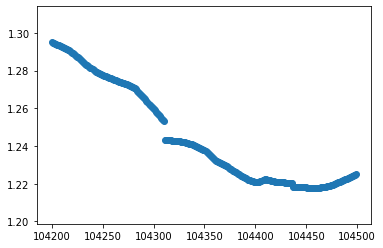

sma100.0


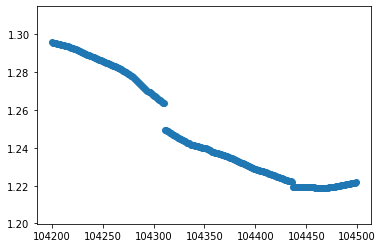

sma100.1


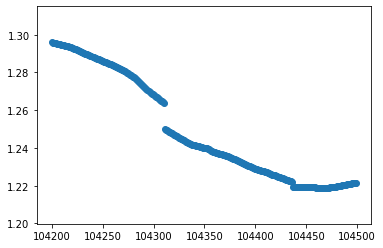

sma100.2


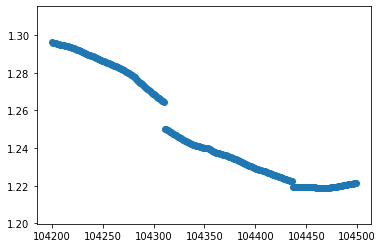

sar0


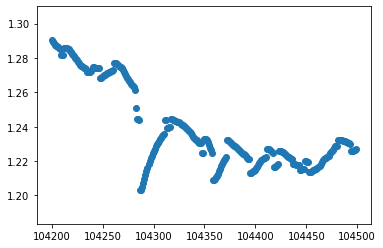

sar1


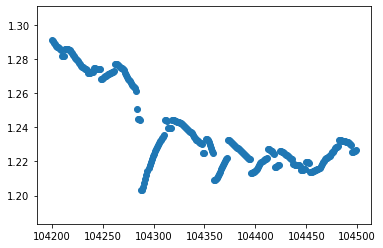

sar2


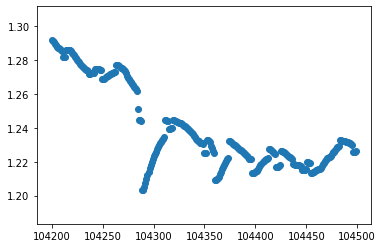

fastK0


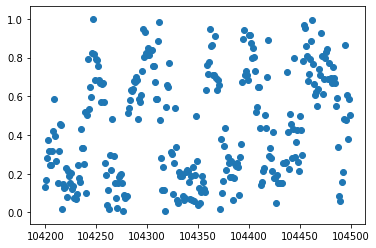

fastD0


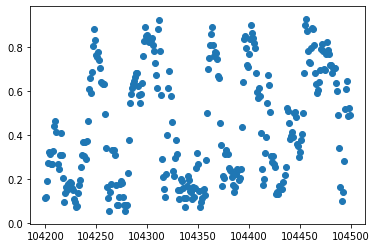

stoch0


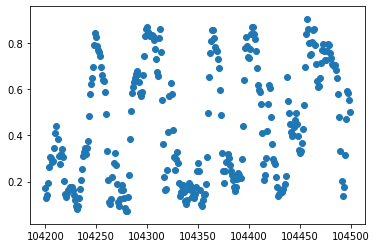

fastK1


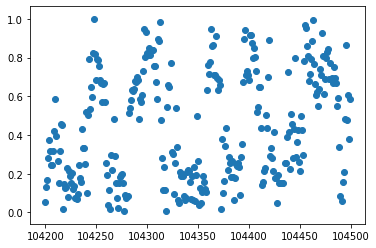

fastD1


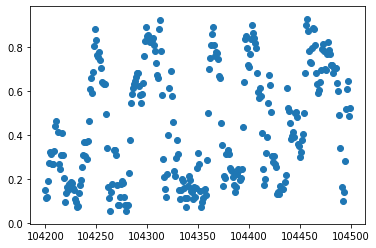

stoch1


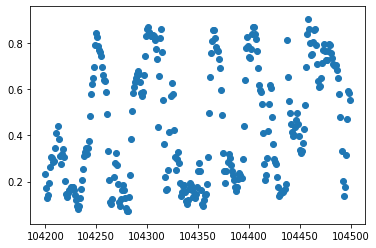

fastK2


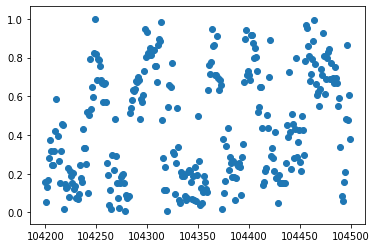

fastD2


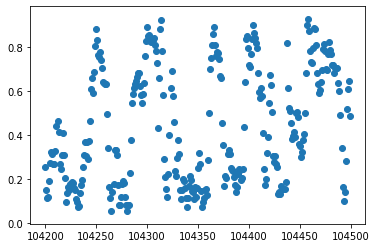

stoch2


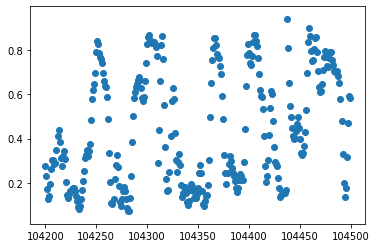

In [17]:
### We take a closer look at this area (I've zoomed in several times and located the indexes where jumps happen).
x = range(104200,104500)# 104000:104800#yearmonth[103500:104500]#data['date']
for k in data.columns[5:]:
    print(k)
    plt.scatter(x,data[k][104200:104500])
    plt.show()

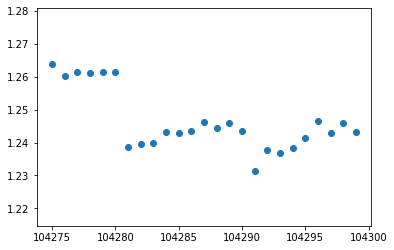

In [18]:
### Even closer.
x = range(104275,104300)
plt.scatter(x,target_data[104275:104300])
plt.show()


In [19]:
### And now we see at which time that happened. We search on internet on what happened at that time.
data['date'][104275:104300]

104275    2016-10-06 13:00:00
104276    2016-10-06 14:00:00
104277    2016-10-06 15:00:00
104278    2016-10-06 16:00:00
104279    2016-10-06 17:00:00
104280    2016-10-06 18:00:00
104281    2016-10-06 19:00:00
104282    2016-10-06 20:00:00
104283    2016-10-06 21:00:00
104284    2016-10-06 22:00:00
104285    2016-10-06 23:00:00
104286    2016-10-07 00:00:00
104287    2016-10-07 01:00:00
104288    2016-10-07 02:00:00
104289    2016-10-07 03:00:00
104290    2016-10-07 04:00:00
104291    2016-10-07 05:00:00
104292    2016-10-07 06:00:00
104293    2016-10-07 07:00:00
104294    2016-10-07 08:00:00
104295    2016-10-07 09:00:00
104296    2016-10-07 10:00:00
104297    2016-10-07 11:00:00
104298    2016-10-07 12:00:00
104299    2016-10-07 13:00:00
Name: date, dtype: object

Reasons for strange numbers,an outlier: https://www.bbc.com/news/business-37584727

In [20]:
### Train data; we can train up to date x and then after that, which given the time series might be better. But
### for sake of practice, we randomly select the dataset.

In [21]:
### Randomizing train and test set.
our_sample = random.sample(range(0,len(target_data)),round(len(target_data)*0.8))

In [22]:
not_in_indices = [x for x in range(len(target_data)) if x not in our_sample]


In [23]:
train_sample = dependent_data[our_sample]
test_sample = dependent_data[not_in_indices]
train_target = target_data[our_sample]
test_target = target_data[not_in_indices]

In [24]:
print (train_sample.shape)
print (test_sample.shape)
print (train_target.shape)
print (test_target.shape)


(96674, 53)
(24168, 53)
(96674,)
(24168,)


In [25]:
### We then simply store all that information as numpy save file.
np.save('train_sample', train_sample)
np.save('test_sample', test_sample)
np.save('train_target', train_target)
np.save('test_target', test_target)